In [ ]:
import pandas as pd
from google.colab import auth
from google.auth import default
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

# Authenticate and mount Google Drive
auth.authenticate_user()
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/InspiritAI/cleandata.csv'

# Read the CSV file
df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
df.shape

(3018, 847)

In [ ]:
df.head()

,Unnamed: 0,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,vision_away_11,penalties_away_11,marking_away_11,standing_tackle_away_11,sliding_tackle_away_11,gk_diving_away_11,gk_handling_away_11,gk_kicking_away_11,gk_positioning_away_11,gk_reflexes_away_11
0,1488,1,1,2015/2016,1,2015-07-24 00:00:00,1979832,9997,8342,2,...,66.0,62.0,42.0,43.0,45.0,11.0,13.0,7.0,6.0,8.0
1,1489,1,1,2015/2016,1,2015-07-25 00:00:00,1979833,8571,9985,2,...,71.0,58.0,14.0,20.0,33.0,13.0,13.0,7.0,10.0,7.0
2,1490,1,1,2015/2016,1,2015-07-25 00:00:00,1979834,9987,1773,3,...,57.0,53.0,15.0,13.0,19.0,10.0,10.0,8.0,12.0,14.0
3,1491,1,1,2015/2016,1,2015-07-25 00:00:00,1979835,8573,8203,3,...,59.0,70.0,25.0,25.0,25.0,15.0,11.0,12.0,11.0,15.0
4,1492,1,1,2015/2016,1,2015-07-25 00:00:00,1979836,10000,9994,3,...,46.0,63.0,15.0,16.0,14.0,14.0,11.0,11.0,12.0,10.0


In [ ]:
def determine_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'home_win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'away_win'
    else:
        return 'tie'

df['result'] = df.apply(determine_result, axis=1)

# Display the first few rows of the updated DataFrame
print(df[['home_team_goal', 'away_team_goal', 'result']].head(5))

   home_team_goal  away_team_goal    result
0               2               1  home_win
1               2               1  home_win
2               3               1  home_win
3               3               1  home_win
4               3               1  home_win


In [ ]:
def convert_to_numerical(column):
    unique_values = set(column.dropna().unique())

    if unique_values <= {'left', 'right'}:
        return column.map({'right': 1, 'left': 2})
    elif unique_values <= {'low', 'medium', 'high'}:
        return column.map({'low': 1, 'medium': 2, 'high': 3})
    elif unique_values <= {'home_win','away_win','tie'}:
        return column.map({'home_win': 1,'away_win': 2,'tie': 0})
    else:
        le = LabelEncoder()
        return le.fit_transform(column.astype(str)) + 1  # Add 1 to start from 1 instead of 0

# Find categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Convert each categorical column
for col in categorical_columns:
    df[col] = convert_to_numerical(df[col])

# Display the first few rows of the updated DataFrame
print(df.head())

# Display info about the DataFrame to see the new data types
print(df.info())

# Print the unique values in each converted column
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))

   Unnamed: 0  country_id  league_id  season  stage  date  match_api_id  \
0        1488           1          1       1      1     5       1979832   
1        1489           1          1       1      1     6       1979833   
2        1490           1          1       1      1     6       1979834   
3        1491           1          1       1      1     6       1979835   
4        1492           1          1       1      1     6       1979836   

   home_team_api_id  away_team_api_id  home_team_goal  ...  penalties_away_11  \
0              9997              8342               2  ...               62.0   
1              8571              9985               2  ...               58.0   
2              9987              1773               3  ...               53.0   
3              8573              8203               3  ...               70.0   
4             10000              9994               3  ...               63.0   

   marking_away_11  standing_tackle_away_11  sliding_tackle_aw

In [ ]:
print(list(df.iloc[0]))

[1488.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1979832.0, 9997.0, 8342.0, 2.0, 1.0, 242243.0, 130738.0, 164323.0, 210392.0, 466480.0, 641042.0, 613260.0, 215415.0, 207603.0, 466589.0, 365245.0, 104384.0, 543969.0, 445873.0, 305132.0, 178293.0, 109061.0, 113868.0, 26440.0, 465730.0, 37069.0, 201915.0, 10793.0, 344.0, 212632.0, 182.88, 172.0, 1.0, 2.0, 4.0, 12.0, 16.0, 13.0, 16.0, 15.0, 19.0, 23.0, 23.0, 46.0, 37.0, 57.0, 18.0, 78.0, 32.0, 65.0, 18.0, 23.0, 18.0, 16.0, 39.0, 25.0, 16.0, 13.0, 16.0, 72.0, 67.0, 64.0, 69.0, 75.0, 6501.0, 385.0, 229641.0, 175.26, 143.0, 1.0, 3.0, 6.0, 63.0, 21.0, 52.0, 26.0, 64.0, 51.0, 68.0, 36.0, 73.0, 76.0, 57.0, 31.0, 66.0, 72.0, 58.0, 25.0, 71.0, 63.0, 56.0, 36.0, 45.0, 68.0, 66.0, 70.0, 7.0, 12.0, 8.0, 6.0, 9.0, 9269.0, 577.0, 18115.0, 185.42, 172.0, 2.0, 2.0, 8.0, 50.0, 40.0, 72.0, 30.0, 40.0, 51.0, 51.0, 35.0, 69.0, 65.0, 69.0, 54.0, 74.0, 70.0, 75.0, 23.0, 68.0, 67.0, 37.0, 39.0, 57.0, 64.0, 67.0, 63.0, 15.0, 6.0, 15.0, 13.0, 7.0, 11000.0, 742.0, 199725.0, 190.

In [ ]:
print(df.shape)
df.columns.to_list()


(3018, 848)


['Unnamed: 0',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11',
 'id_home_1',
 'player_name_home_1',
 'player_fifa_api_id_home_1',
 'height_home_1',
 'weight_home_1',
 'preferred_foot_home_1',
 'attacking_work_rate_home_1',
 'defensive_work_rate_home_1',
 'crossing_home_1',
 'finishing_home_1',
 'heading_accuracy_home_1',
 'volleys_home_1',
 'dribbling_home_1',
 'long_passing_home_1',
 'ball_control_home_1',
 'acceleration_home_1',
 'sprint_speed_home_1',
 'agility_home_1',
 'reactions_ho

In [ ]:
df.select_dtypes(exclude=['number']).columns.tolist()

[]

In [ ]:
meanvalues=df.mean()
print(meanvalues)

Unnamed: 0                13813.550033
country_id                11468.642478
league_id                 11468.642478
season                        1.000000
stage                        18.340954
                              ...     
gk_handling_away_11          10.940318
gk_kicking_away_11           12.716512
gk_positioning_away_11       10.774204
gk_reflexes_away_11          10.724469
result                        1.052021
Length: 848, dtype: float64


In [ ]:
df.fillna(meanvalues, inplace=True)

0       1
1       1
2       1
3       1
4       1
       ..
3013    0
3014    1
3015    2
3016    1
3017    1
Name: result, Length: 3018, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Accuracy: 43.05%
Decision Tree Model Accuracy: 100.00%


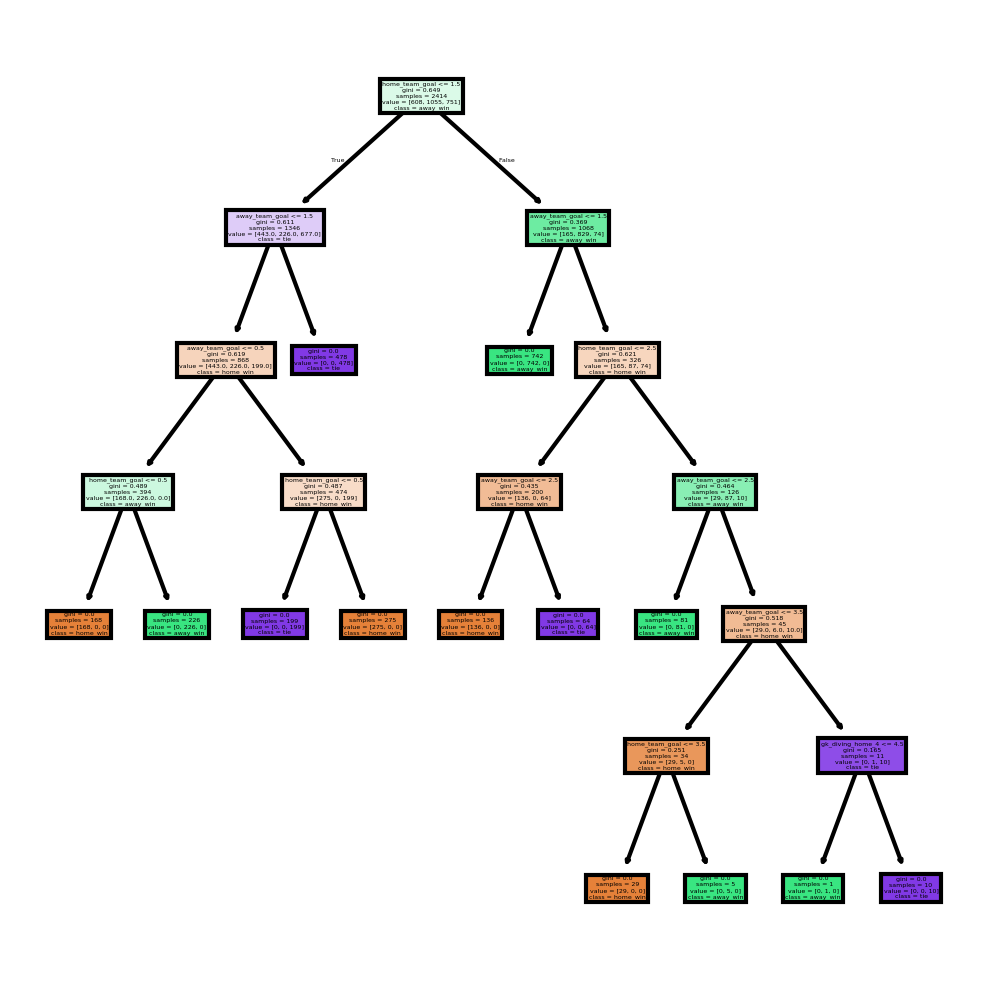

In [ ]:
y = df['result']
print(y)

X = df.drop(columns=['Unnamed: 0','match_api_id', 'home_team_api_id', 'away_team_api_id','country_id',
             'league_id', 'id_home_1', 'player_fifa_api_id_home_1', 'id_home_2','id_home_3', 'id_home_4', 'id_home_5',
             'id_home_6', 'id_home_7', 'id_home_8', 'id_home_9', 'id_home_10', 'id_home_11', 'player_fifa_api_id_home_2',
             'player_fifa_api_id_home_3','player_fifa_api_id_home_4', 'player_fifa_api_id_home_5', 'player_fifa_api_id_home_6',
             'player_fifa_api_id_home_7', 'player_fifa_api_id_home_8', 'player_fifa_api_id_home_9', 'player_fifa_api_id_home_10',
             'player_fifa_api_id_home_11', 'player_fifa_api_id_away_1','id_away_1','player_fifa_api_id_away_2','player_fifa_api_id_away_3',
             'player_fifa_api_id_away_4','player_fifa_api_id_away_5','player_fifa_api_id_away_6','player_fifa_api_id_away_7',
             'player_fifa_api_id_away_8','player_fifa_api_id_away_9','player_fifa_api_id_away_10','player_fifa_api_id_away_11',
             'id_away_2','id_away_3','id_away_4','id_away_5','id_away_6','id_away_7','id_away_8','id_away_9','id_away_10','id_away_11', 'result', 'season', 'stage', 'date']) #'home_team_goal', 'away_team_goal'])

from sklearn.model_selection import train_test_split


 # YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

from sklearn.tree import DecisionTreeClassifier


decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)
predictions = decision_model.predict(X_test)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Decision Tree Model Accuracy: {:.2%}'.format(score))

from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(decision_model,
               feature_names = X.columns.values,
               class_names=['home_win', 'away_win', 'tie'],
               filled = True);

In [ ]:
y = df['result']
print(y)

X = df.drop(columns=['Unnamed: 0','match_api_id', 'home_team_api_id', 'away_team_api_id','country_id',
             'league_id', 'id_home_1', 'player_fifa_api_id_home_1', 'id_home_2','id_home_3', 'id_home_4', 'id_home_5',
             'id_home_6', 'id_home_7', 'id_home_8', 'id_home_9', 'id_home_10', 'id_home_11', 'player_fifa_api_id_home_2',
             'player_fifa_api_id_home_3','player_fifa_api_id_home_4', 'player_fifa_api_id_home_5', 'player_fifa_api_id_home_6',
             'player_fifa_api_id_home_7', 'player_fifa_api_id_home_8', 'player_fifa_api_id_home_9', 'player_fifa_api_id_home_10',
             'player_fifa_api_id_home_11', 'player_fifa_api_id_away_1','id_away_1','player_fifa_api_id_away_2','player_fifa_api_id_away_3',
             'player_fifa_api_id_away_4','player_fifa_api_id_away_5','player_fifa_api_id_away_6','player_fifa_api_id_away_7',
             'player_fifa_api_id_away_8','player_fifa_api_id_away_9','player_fifa_api_id_away_10','player_fifa_api_id_away_11',
             'id_away_2','id_away_3','id_away_4','id_away_5','id_away_6','id_away_7','id_away_8','id_away_9','id_away_10','id_away_11', 'result', 'season', 'stage', 'date','home_team_goal', 'away_team_goal'])

0       1
1       1
2       1
3       1
4       1
       ..
3013    0
3014    1
3015    2
3016    1
3017    1
Name: result, Length: 3018, dtype: int64


In [ ]:
X.shape

(3018, 792)

In [ ]:
from sklearn.model_selection import train_test_split


 # YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))


Logistic Regression Model Accuracy: 42.88%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier


decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)
predictions = decision_model.predict(X_test)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Decision Tree Model Accuracy: {:.2%}'.format(score))

Decision Tree Model Accuracy: 39.07%


In [ ]:
print(y_test)
print(predictions)

1323    1
798     1
479     1
44      0
414     1
       ..
2705    0
199     1
283     0
231     0
2769    1
Name: result, Length: 604, dtype: int64
[2 2 0 2 0 0 1 1 0 0 1 1 1 2 0 1 0 1 2 2 1 1 2 1 1 1 1 0 2 1 2 2 1 2 2 1 2
 0 2 0 2 1 0 0 2 0 1 0 1 0 2 0 1 2 0 1 2 1 1 0 1 2 2 0 1 2 0 0 1 2 1 2 2 0
 0 0 2 1 1 2 1 2 1 1 1 2 0 0 1 1 0 0 2 1 2 1 0 2 2 2 1 1 1 2 0 2 1 0 1 2 2
 1 0 2 2 1 1 1 2 1 1 1 1 2 0 1 1 1 1 1 1 2 0 1 1 1 0 2 0 0 1 0 1 0 0 0 1 0
 1 2 1 1 1 0 1 1 0 1 1 1 0 1 1 2 2 2 1 1 0 2 2 0 0 1 1 0 2 2 1 1 2 2 1 0 1
 1 0 1 0 1 2 2 0 0 0 1 0 1 1 2 0 1 2 2 0 2 0 0 0 0 1 2 1 1 0 1 2 1 2 0 1 1
 2 0 1 2 1 1 2 1 2 1 0 0 1 1 2 1 0 2 0 2 2 1 1 0 2 1 2 2 2 2 1 2 0 2 1 1 2
 1 0 2 1 0 1 1 1 0 1 0 1 2 1 2 0 1 2 2 1 2 1 0 2 1 2 0 2 0 2 1 2 2 2 1 1 0
 0 1 1 1 1 1 2 1 0 0 2 2 1 2 1 0 1 0 1 1 1 1 2 0 0 0 0 2 1 2 1 2 1 0 2 2 2
 1 2 2 2 1 0 2 2 0 1 1 1 1 0 1 1 1 0 1 2 1 1 0 2 1 2 2 1 1 2 1 1 0 1 0 1 1
 1 1 2 1 1 2 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 2 2 1 2 1 0 1 2 1 0 1 2 1 2 2 0
 0 2 1 1 1 1 1 0 1 1 0 2 

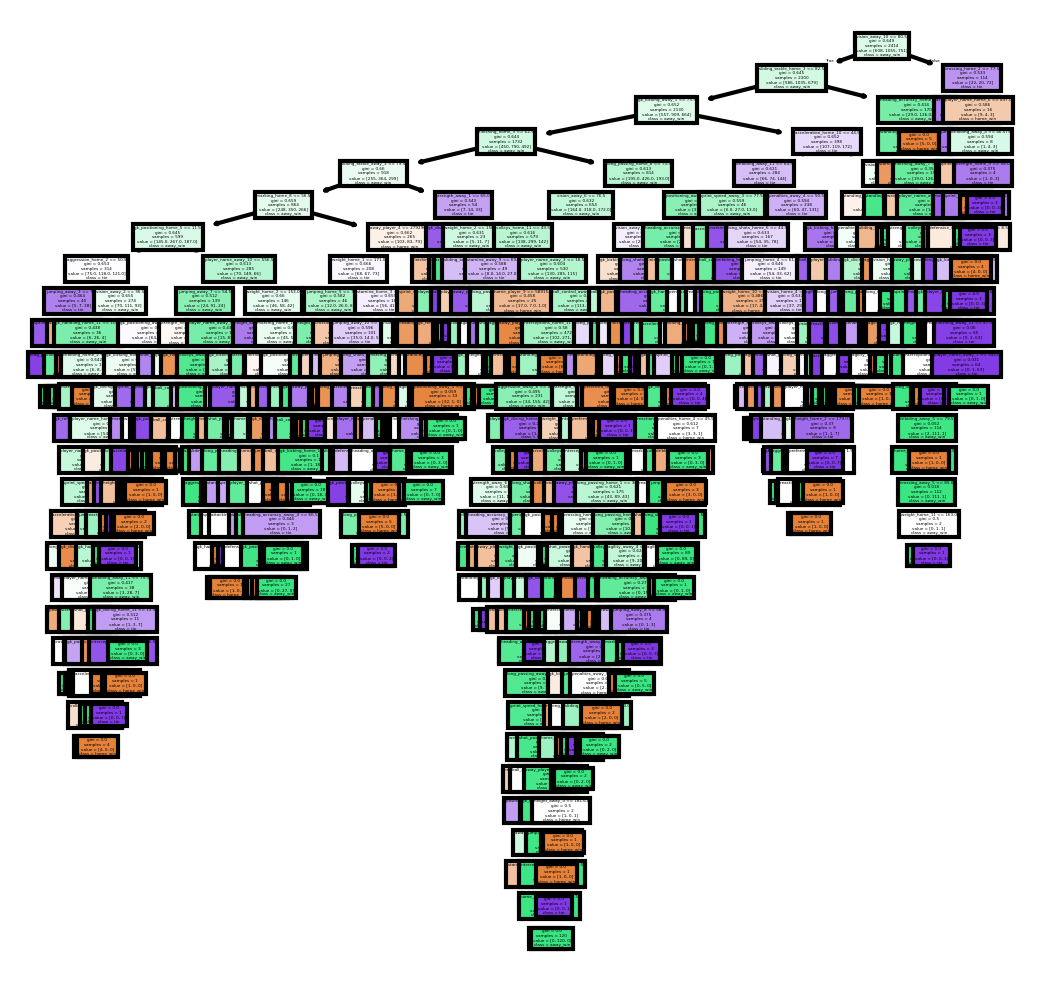

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(decision_model,
               feature_names = X.columns.values,
               class_names=['home_win', 'away_win', 'tie'],
               filled = True);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=10, random_state=0)

rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Random Forest Model Accuracy: {:.2%}'.format(score))

Random Forest Model Accuracy: 49.50%


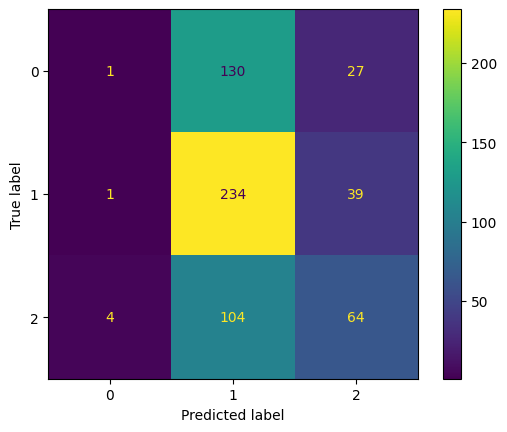

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
y_test.value_counts()

,count
result,
1,274
2,172
0,158


In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10,50,80,1000))
#10,50,80,100))
MLP_model.fit(X_train, y_train)
predictions = MLP_model.predict(X_test)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('MLP Model Accuracy: {:.2%}'.format(score))

MLP Model Accuracy: 45.20%


In [ ]:
layer_sizes = [(100,100,100),(200,200,200),(600,400),(80,70,60,50)]

for layers in layer_sizes:
  MLP_model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=layers)
  #10,50,80,100))
  MLP_model.fit(X_train, y_train)
  predictions = MLP_model.predict(X_test)
  from sklearn.metrics import accuracy_score

  score = accuracy_score(y_test, predictions)
  print('MLP Model Accuracy: {:.2%}'.format(score))

MLP Model Accuracy: 38.91%
MLP Model Accuracy: 34.11%
MLP Model Accuracy: 40.73%
MLP Model Accuracy: 30.96%


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)


PCA()

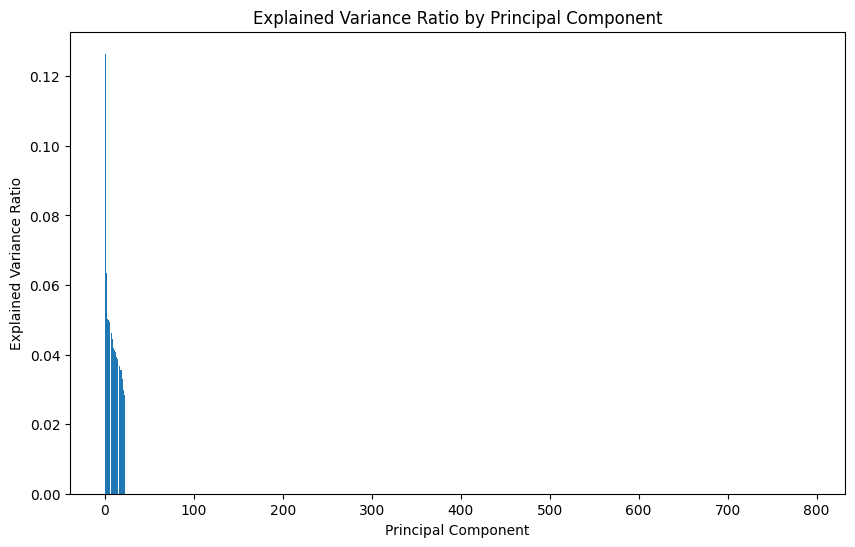

In [ ]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, X.shape[1] + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

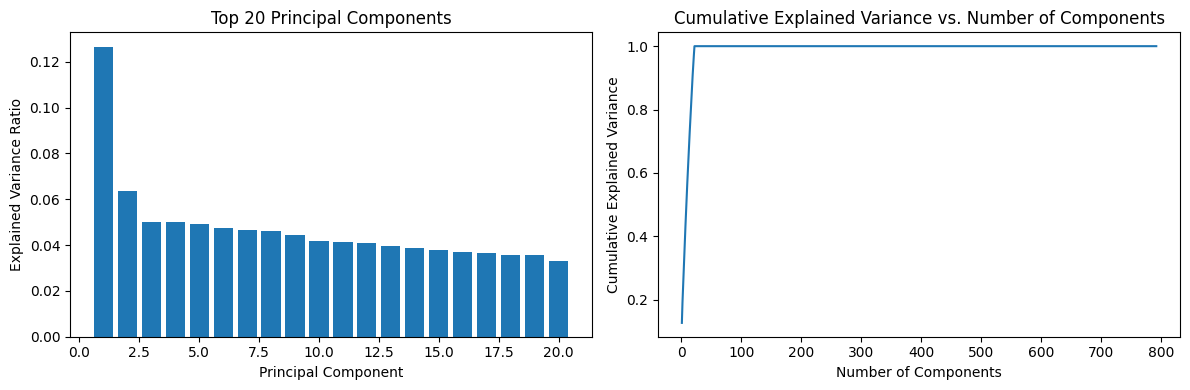

Explained variance ratio of top 10 components:
[0.12647041 0.06355953 0.05021026 0.04987069 0.04934493 0.04743987
 0.04664155 0.04633219 0.04444573 0.04194511]

Number of components for 80% variance: 16
Number of components for 90% variance: 19
Number of components for 95% variance: 21

Top 10 features contributing to Principal Component 1:
           feature  importance
8    home_player_9    0.255780
20  away_player_10    0.245375
19   away_player_9    0.245099
9   home_player_10    0.243874
21  away_player_11    0.239933
12   away_player_2    0.230041
18   away_player_8    0.226614
16   away_player_6    0.225320
7    home_player_8    0.224934
1    home_player_2    0.224629

Top 10 features contributing to Principal Component 2:
           feature  importance
19   away_player_9    0.323852
9   home_player_10    0.298620
20  away_player_10    0.287002
8    home_player_9    0.258643
3    home_player_4    0.254255
7    home_player_8    0.245171
14   away_player_4    0.226389
15   away_pl

In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.bar(range(1, 21), pca.explained_variance_ratio_[:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Top 20 Principal Components')
# Plot cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.tight_layout()
plt.show()
# Print summary statistics
print("Explained variance ratio of top 10 components:")
print(pca.explained_variance_ratio_[:10])
print(f"\nNumber of components for 80% variance: {np.argmax(cumulative_variance_ratio >= 0.8) + 1}")
print(f"Number of components for 90% variance: {np.argmax(cumulative_variance_ratio >= 0.9) + 1}")
print(f"Number of components for 95% variance: {np.argmax(cumulative_variance_ratio >= 0.95) + 1}")
# Show top features contributing to first 3 principal components
for i in range(3):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(pca.components_[i])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print(f"\nTop 10 features contributing to Principal Component {i+1}:")
    print(feature_importance.head(10))
# Function to find optimal number of components using elbow method
def find_elbow(cumulative_variance):
    npoints = len(cumulative_variance)
    allCoord = np.vstack((range(npoints), cumulative_variance)).T
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * lineVecNorm, axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    idxOfBestPoint = np.argmax(distToLine)
    return idxOfBestPoint + 1
# Find optimal number of components
optimal_n_components = find_elbow(cumulative_variance_ratio)
print(f"\nOptimal number of components (elbow method): {optimal_n_components}")

In [ ]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_train_pca, y_train)
predictions = rf_model.predict(X_test_pca)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Random Forest Model Accuracy: {:.2%}'.format(score))

Random Forest Model Accuracy: 43.87%


In [ ]:
MLP_model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10,50,80,1000))
#10,50,80,100))
MLP_model.fit(X_train_pca, y_train)
predictions = MLP_model.predict(X_test_pca)
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('MLP Model Accuracy: {:.2%}'.format(score))

MLP Model Accuracy: 35.10%


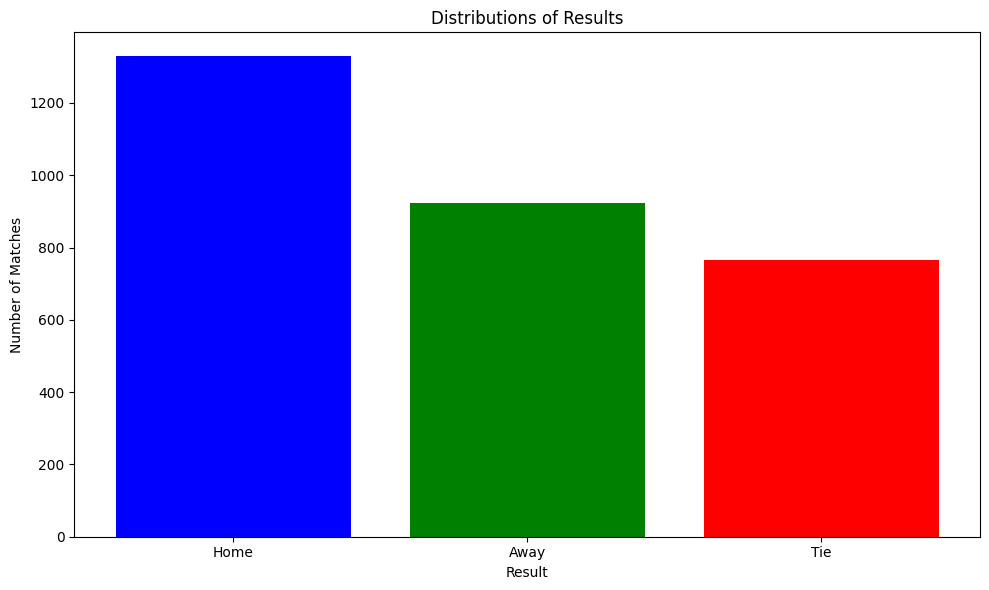

In [ ]:
result_counts = df['result'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(["Home", "Away", "Tie"], result_counts.values, color=['blue', 'green', 'red'])
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.title("Distributions of Results")
plt.tight_layout()
plt.show()

In [ ]:
print(result_counts.index)

Index([1, 2, 0], dtype='int64', name='result')


In [ ]:
models=["MLP Model", "Random Forest Model", "Decision Tree Model", "Logistic Regression Model ", "Random Forest Model with PCA", "MLP Model with PCA", "Random Baseline"]
accuracies =[45.20, 49.50, 40.40, 42.88, 43.71, 34.27, 33.33]

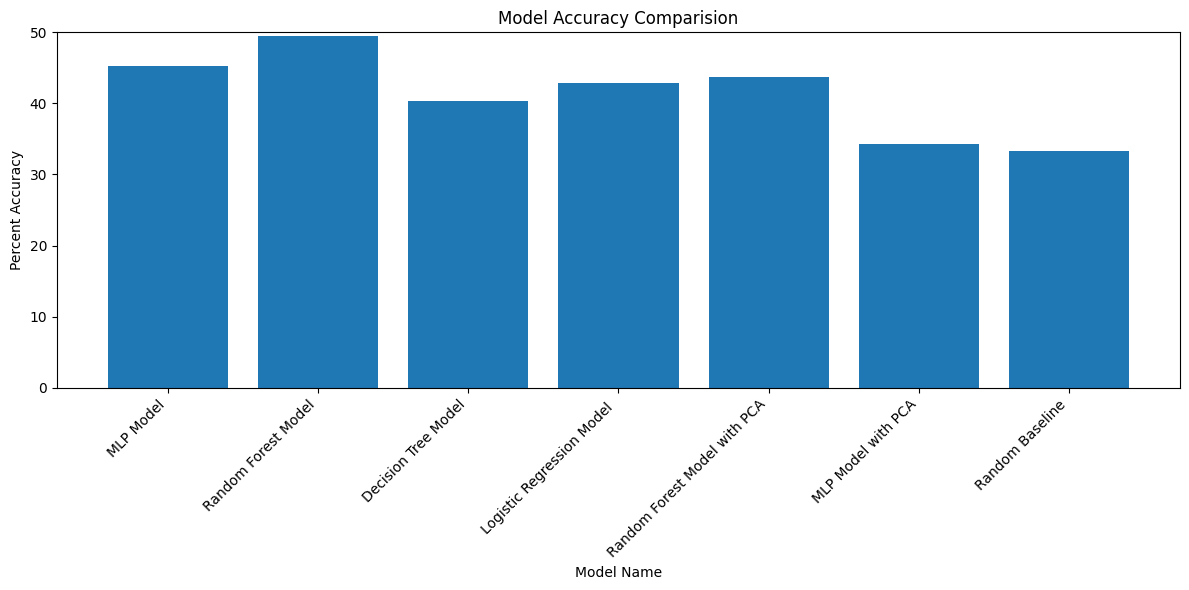

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50)
plt.xlabel("Model Name")
plt.ylabel("Percent Accuracy")
plt.title("Model Accuracy Comparision")
plt.tight_layout()
plt.show()
